<a href="https://colab.research.google.com/github/nicholasl33/ML-Data/blob/main/Unit_4_Mini_Project_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nicholasl33/ML-Data/main/diabetic_data.csv')

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
id = pd.read_csv('https://raw.githubusercontent.com/nicholasl33/ML-Data/main/IDs_mapping.csv')

In [ ]:
id.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [ ]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
df.shape

(101766, 50)

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


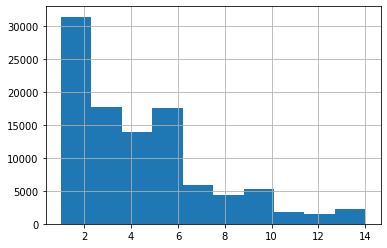

In [ ]:
df['time_in_hospital'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe675101e50>,
      dtype=object)

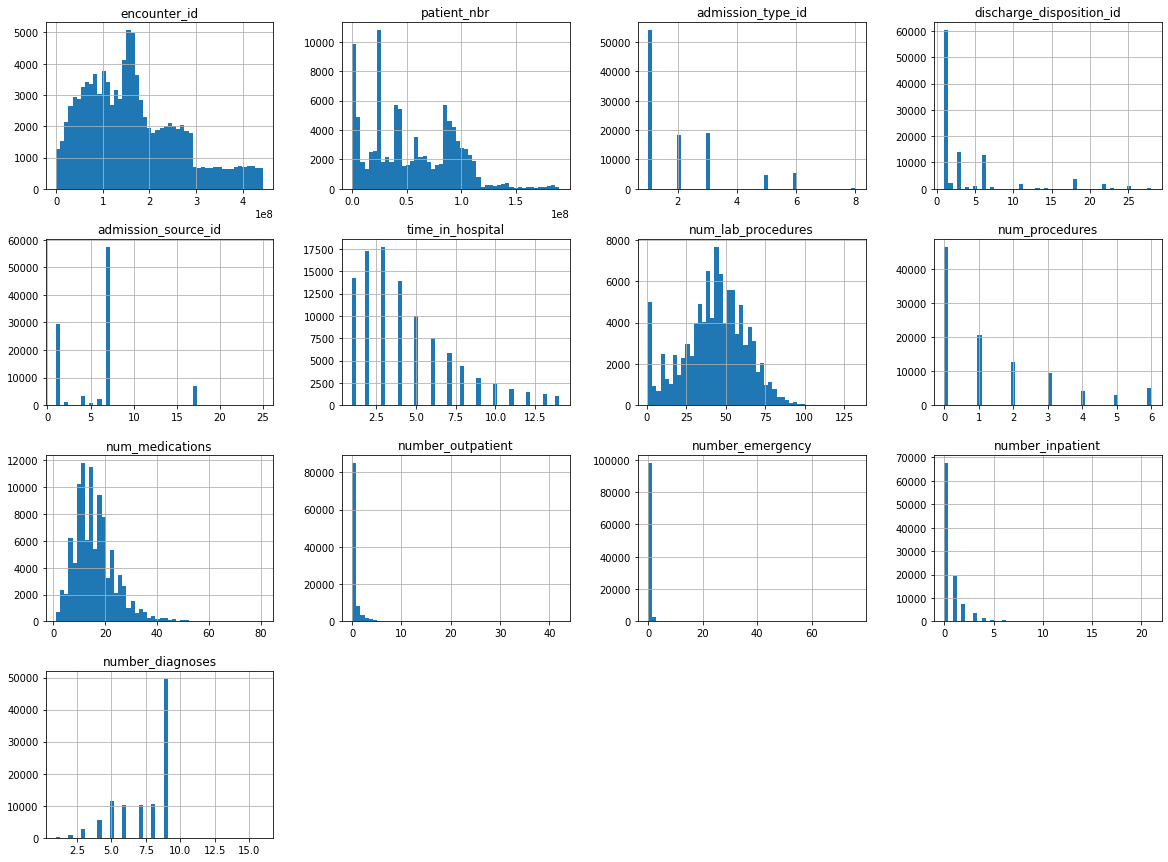

In [ ]:
df.hist(bins=50, figsize=(20, 15))

In [ ]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

# Data Wrangling

In [ ]:
df.value_counts()

encounter_id  patient_nbr  race       gender  age      weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty       num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
443867222     175429310    Caucasian  Male    [70-80)  ?       1                  1                         7                    6                 ?           ?                       13                  3               3                0                  0              

In [ ]:
df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [ ]:
df.drop(['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    101766 non-null  object
 4   time_in_hospital          101766 non-null  int64 
 5   medical_specialty         101766 non-null  object
 6   num_lab_procedures        101766 non-null  int64 
 7   num_procedures            101766 non-null  int64 
 8   num_medications           101766 non-null  int64 
 9   number_outpatient         101766 non-null  int64 
 10  number_emergency          101766 non-null  int64 
 11  number_inpatient          101766 non-null  int64 
 12  diag_1                    101766 non-null  object
 13  diag_2                    101766 non-null  object
 14  diag

In [ ]:
df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

In [ ]:
df_2 = pd.get_dummies(df)

In [ ]:
df_2

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),weight_>200,weight_?,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),medical_specialty_?,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,...,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,1,41,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1
1,3,59,0,18,0,0,0,9,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
2,2,11,5,13,2,0,1,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1
3,2,44,1,16,0,0,0,7,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
4,1,51,0,8,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
101762,5,33,3,18,0,0,1,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1
101763,1,53,0,9,1,0,0,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
101764,10,45,2,21,0,0,1,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1


In [ ]:
df.drop(['readmitted'], axis=1, inplace=True)

In [ ]:
df.head()

,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),?,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),?,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),?,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),?,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),?,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes


In [ ]:
dummies = pd.get_dummies(df)

In [ ]:
dummies

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),weight_>200,weight_?,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),medical_specialty_?,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,...,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,1,41,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
1,3,59,0,18,0,0,0,9,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
2,2,11,5,13,2,0,1,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
3,2,44,1,16,0,0,0,7,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
4,1,51,0,8,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
101762,5,33,3,18,0,0,1,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
101763,1,53,0,9,1,0,0,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
101764,10,45,2,21,0,0,1,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(dummies)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(dummies)

In [ ]:
scaled_features

array([[-1.13764856, -0.10651686, -0.78539774, ...,  0.92659052,
         1.82986799, -1.82986799],
       [-0.46765271,  0.80838387, -0.78539774, ..., -1.07922537,
        -0.54648751,  0.54648751],
       [-0.80265063, -1.63135141,  2.14578066, ...,  0.92659052,
        -0.54648751,  0.54648751],
       ...,
       [-1.13764856,  0.50341696, -0.78539774, ..., -1.07922537,
        -0.54648751,  0.54648751],
       [ 1.87733278,  0.09679441,  0.38707362, ..., -1.07922537,
        -0.54648751,  0.54648751],
       [ 0.53734107, -1.52969578,  0.9733093 , ...,  0.92659052,
         1.82986799, -1.82986799]])

In [ ]:
df_feature = pd.DataFrame(scaled_features, columns=dummies.columns)

In [ ]:
df_feature.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),weight_>200,weight_?,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),medical_specialty_?,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,...,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596,-0.151148,-0.482380,-0.079616,0.580762,-0.142917,-0.12256,0.927452,-0.927397,-0.00543,25.121444,-0.082683,-0.128654,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,-0.00543,0.180095,-0.021723,-0.07861,-0.037774,-0.018548,-0.010397,-0.030888,-0.094301,-0.115338,-0.981810,-0.008294,-0.01086,...,-0.048007,-0.029251,0.258299,-0.252514,-0.041859,-0.00543,0.055098,-0.053919,-0.009913,-0.00701,0.019327,-0.017456,-0.004433,0.00543,-0.00543,0.01958,-0.019327,-0.003135,0.0,0.0,-0.369379,1.071323,-0.659546,-0.353706,-0.007679,0.083582,-0.082743,-0.008867,0.011303,-0.011303,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,-0.926591,0.926591,1.829868,-1.829868
1,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784,-0.151148,-0.482380,-0.079616,0.580762,-0.142917,-0.12256,0.927452,-0.927397,-0.00543,-0.039807,12.094359,-0.128654,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,-0.00543,0.180095,-0.021723,-0.07861,-0.037774,-0.018548,-0.010397,-0.030888,-0.094301,-0.115338,1.018527,-0.008294,-0.01086,...,-0.048007,-0.029251,0.258299,-0.252514,-0.041859,-0.00543,0.055098,-0.053919,-0.009913,-0.00701,0.019327,-0.017456,-0.004433,0.00543,-0.00543,0.01958,-0.019327,-0.003135,0.0,0.0,-0.369379,-0.933426,-0.659546,2.827208,-0.007679,0.083582,-0.082743,-0.008867,0.011303,-0.011303,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079225,-1.079225,-0.546488,0.546488
2,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733,-0.151148,2.073054,-0.079616,-1.721876,-0.142917,-0.12256,0.927452,-0.927397,-0.00543,-0.039807,-0.082683,7.772761,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,-0.00543,0.180095,-0.021723,-0.07861,-0.037774,-0.018548,-0.010397,-0.030888,-0.094301,-0.115338,1.018527,-0.008294,-0.01086,...,-0.048007,-0.029251,0.258299,-0.252514,-0.041859,-0.00543,0.055098,-0.053919,-0.009913,-0.00701,0.019327,-0.017456,-0.004433,0.00543,-0.00543,0.01958,-0.019327,-0.003135,0.0,0.0,-0.369379,1.071323,-0.659546,-0.353706,-0.007679,0.083582,-0.082743,-0.008867,0.011303,-0.011303,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,-0.926591,0.926591,-0.546488,0.546488
3,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561,-0.151148,-0.482380,-0.079616,0.580762,-0.142917,-0.12256,-1.078223,1.078287,-0.00543,-0.039807,-0.082683,-0.128654,5.094888,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,-0.00543,0.180095,-0.021723,-0.07861,-0.037774,-0.018548,-0.010397,-0.030888,-0.0943

In [ ]:
renew = pd.read_csv('https://raw.githubusercontent.com/nicholasl33/ML-Data/main/diabetic_data.csv')

In [ ]:
renew['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, renew['readmitted'], test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predict = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, predict))

[[ 512 1257 1574]
 [1348 4089 5371]
 [1673 5149 9557]]


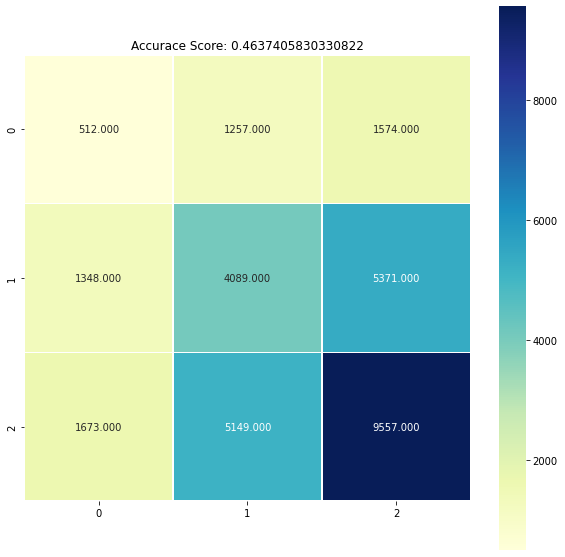

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='.3f', linewidth=.5, square=True, cmap='YlGnBu')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accurace Score: {knn.score(x_test, y_test)}'
plt.title(all_sample_title, size=12); 

In [ ]:
from sklearn import metrics

In [ ]:
score = []

In [ ]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test, y_pred))

print(score)

[0.4637405830330822, 0.39603668522764496, 0.45967900425810676, 0.47540124467736655, 0.4889944317065182, 0.4917785784474288, 0.51051424828038, 0.5089092695709139, 0.5149688830658369, 0.5203734032099574, 0.5229610219456272, 0.5250573206681952, 0.5303635768096954, 0.530789387487717, 0.5343596462495905, 0.5346216835899116, 0.5365542089747789, 0.5395676383884703, 0.5405830330822142, 0.539207337045529, 0.5399279397314117, 0.5423190304618408, 0.542875859810023, 0.5428431051424828, 0.5437274811660662, 0.5430068784801835, 0.5445463478545692, 0.5435964624959057, 0.5447101211922699, 0.5439567638388471, 0.5454634785456928, 0.5447101211922699, 0.5448083851948903, 0.5459220438912545, 0.5470029479200786, 0.5454307238781526, 0.5478218146085817, 0.546839174582378, 0.5471339665902392]


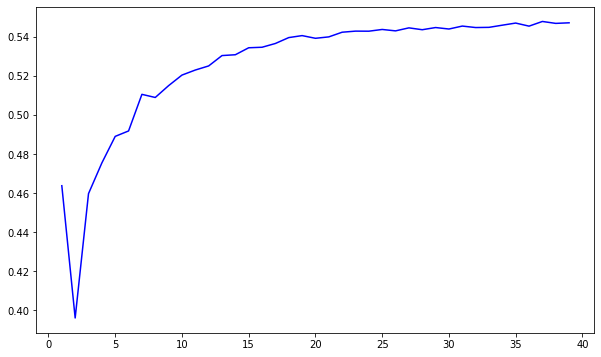

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), score, color='blue')
# x label is value of K of KNN, y label is the testing accuracy